# TASK - 04

### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.



#### 

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [36]:
# Load the dataset
column_names = ['ID', 'entity', 'sentiment', 'comment']
data = pd.read_csv('twitter_training.csv', header=0, names=column_names)
data

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [20]:
data.shape

(74681, 4)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   comment    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
# Count of unique entities
entity_count = data['entity'].value_counts()
print(entity_count)


TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

#### Data preprocessing ( handle missing values, encode categorical variables)



In [5]:
#checking for duplicates
duplicates = data.duplicated()
duplicated_rows = data[duplicates]
duplicated_rows.count()


ID           2700
entity       2700
sentiment    2700
comment      2340
dtype: int64

In [6]:
# Dropping Duplicates
data.drop_duplicates(inplace=True)

In [7]:
#checking for missing values
data.isnull().sum()


ID             0
entity         0
sentiment      0
comment      326
dtype: int64

In [8]:
# Dropping missing value [ Using Dropna]
data = data.dropna()


In [9]:
data.isnull().sum()

ID           0
entity       0
sentiment    0
comment      0
dtype: int64

In [10]:
# Number of Unique Values
data.nunique()


ID           12447
entity          32
sentiment        4
comment      69490
dtype: int64

In [11]:
#displaying sample:
for i in range(4):
    print(f"{i+1}: {data['comment'][i]} -> {data['sentiment'][i]}")


1: I am coming to the borders and I will kill you all, -> Positive
2: im getting on borderlands and i will kill you all, -> Positive
3: im coming on borderlands and i will murder you all, -> Positive
4: im getting on borderlands 2 and i will murder you me all, -> Positive


### Sentiment Analysis

In [12]:
data['sentiment'].value_counts()



Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: sentiment, dtype: int64

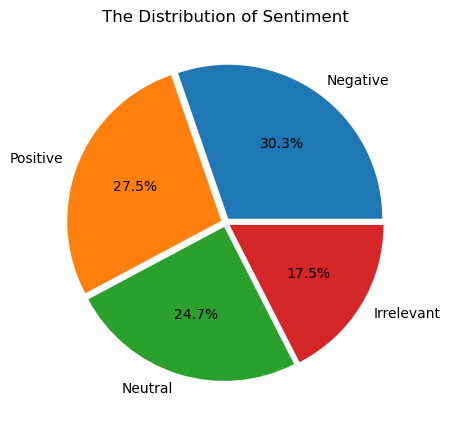

In [13]:
plt.figure(figsize=(10,5))
plt.pie(x=data['sentiment'].value_counts().values, labels=data['sentiment'].value_counts().index, autopct='%.1f%%', explode=[0.03, 0.03,0.03,0.03])
plt.title('The Distribution of Sentiment')
plt.show()

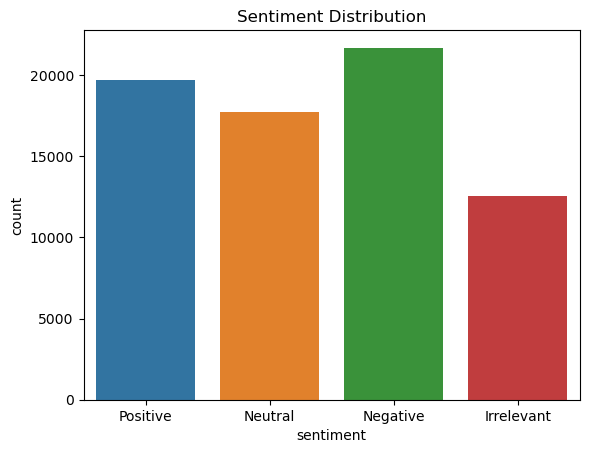

In [14]:
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()


In [15]:
data.dtypes

ID            int64
entity       object
sentiment    object
comment      object
dtype: object

In [19]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   --- ----------------------------------- 61.4/626.3 kB 812.7 kB/s eta 0:00:01
   ----- --------------------------------- 92.2/626.3 kB 744.7 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/626.3 kB 654.9 kB/s eta 0:00:01
   ---------- --------------------------- 174.1/626.3 kB 697.2 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/626.3 kB 655.1 kB/s eta 0:00:01
   -------------- ----------------------- 245.8/626.3 kB 684.7 kB/s eta 0:00:01
   ---------------- --------------------- 276.5/626.3 kB 680.9 kB/s eta 0:00:01
   ------------------- ------------------ 327.7/626.3 kB 700.8 kB/s eta 0:00:01
   ---------------------- --------------- 368.6/626.3 kB 694.6 kB/s eta 0:00:01
   -------------------------- ----------- 430.1/626.3 kB 70

In [20]:
from textblob import TextBlob

In [37]:
# Define a function to handle non-string values
def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0

In [38]:
# Perform sentiment analysis
data['Polarity'] = data['comment'].apply(analyze_sentiment)
data.head(5)

,ID,entity,sentiment,comment,Polarity
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0.0
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0.0
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0.0
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0.0
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,0.0


In [39]:
data['Polarity'].value_counts()

 0.000000    19247
 0.500000     2666
-0.400000     1729
 1.000000     1671
-0.200000     1272
             ...  
 0.022024        1
-0.041429        1
 0.283333        1
 0.044545        1
-0.337500        1
Name: Polarity, Length: 6934, dtype: int64

In [30]:
data.dtypes

ID                   int64
entity              object
sentiment           object
comment             object
Polarity           float64
Sentiment_Label     object
dtype: object

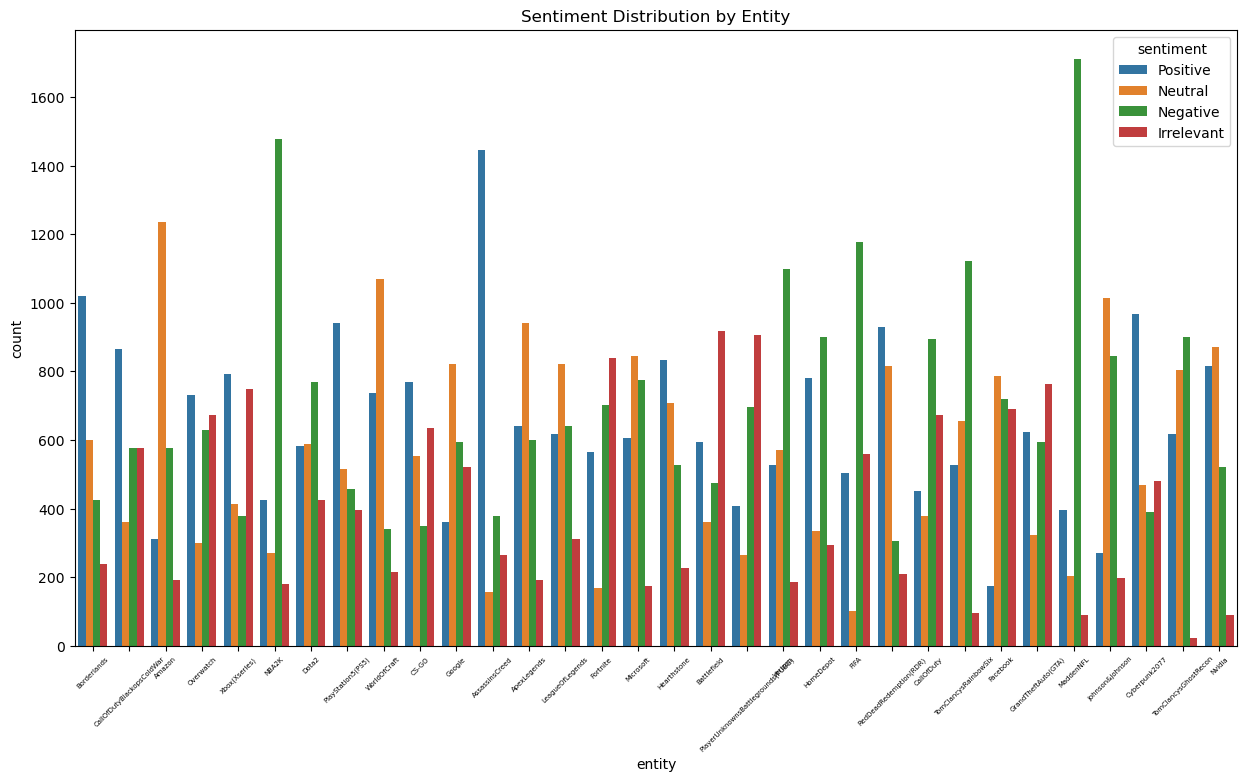

In [61]:
plt.figure(figsize=(15, 8))
sns.countplot(x='entity', hue='sentiment', data=data)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45, fontsize=5)
plt.show()

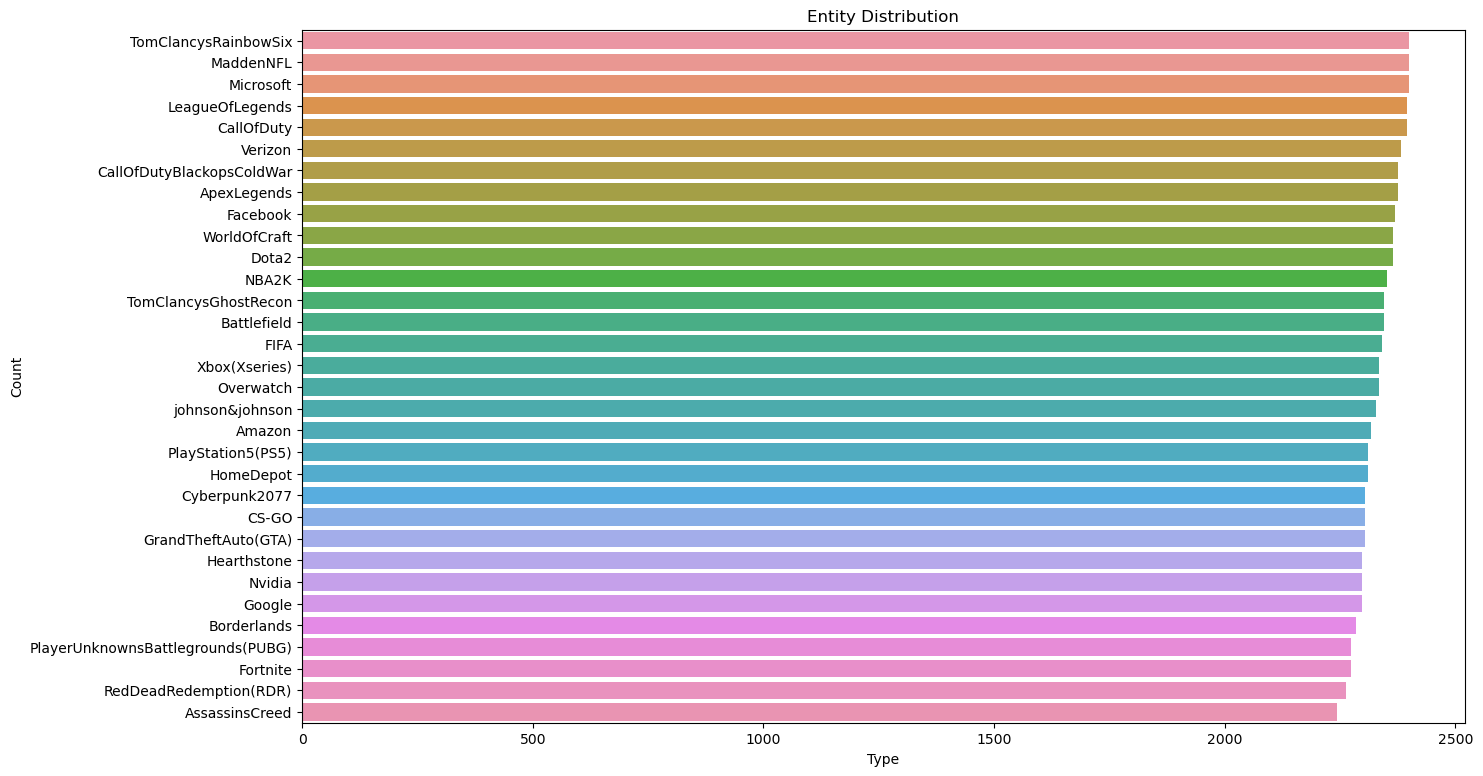

In [52]:
plt.figure(figsize=(15,9))
sns.barplot(x=data['entity'].value_counts().values,y=data['entity'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()

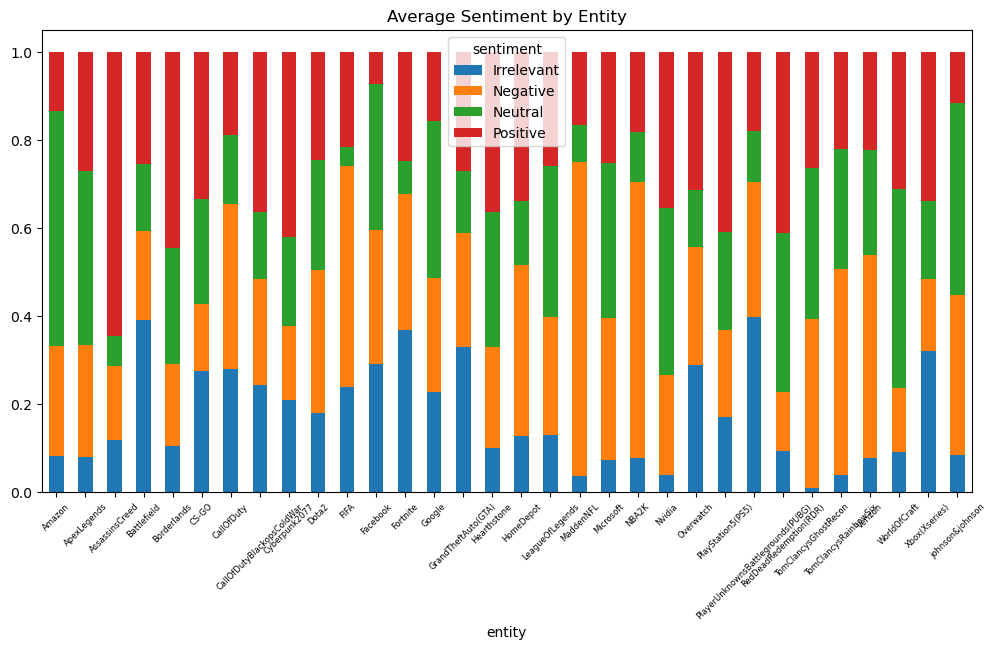

In [53]:
average_sentiment_by_entity = data.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()
average_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment by Entity')
plt.xticks(rotation=45, fontsize=6)
plt.show()

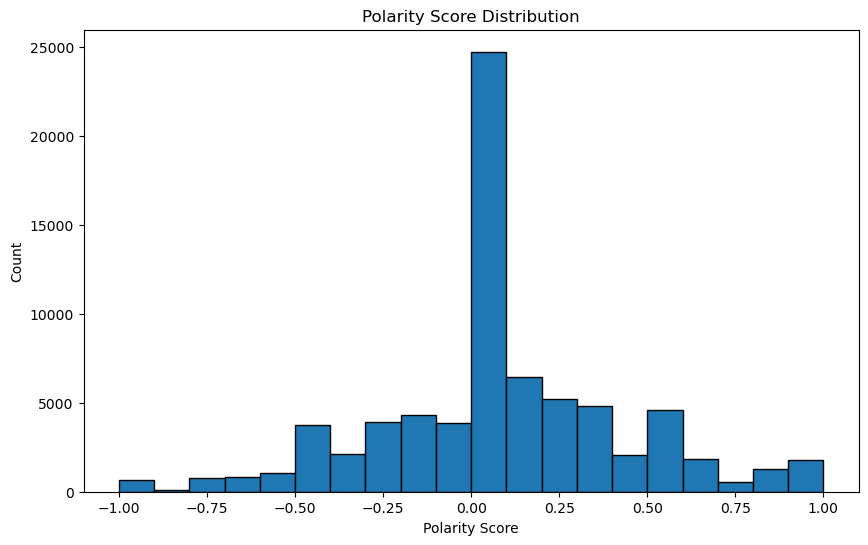

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(data['Polarity'], bins=20, edgecolor='k')
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.show()
     

### Word Cloud

In [62]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benec\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [63]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [64]:
data["comment"] = data["comment"].apply(clean)

In [65]:
data.head()

,ID,entity,sentiment,comment,Polarity,Sentiment_Label,Sentiment_Label_Num
0,2401,Borderlands,Positive,come border kill,0.0,Neutral,1
1,2401,Borderlands,Positive,im get borderland kill,0.0,Neutral,1
2,2401,Borderlands,Positive,im come borderland murder,0.0,Neutral,1
3,2401,Borderlands,Positive,im get borderland murder,0.0,Neutral,1
4,2401,Borderlands,Positive,im get borderland murder,0.0,Neutral,1


In [67]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------- ----------------------------- 81.9/300.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [68]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')

## Word Cloud : Positive sentiment

In [69]:
from PIL import Image, ImageDraw, ImageFont

In [70]:
positive_data = data[data['sentiment'] == 'Positive']['comment'].str.cat(sep=" ")

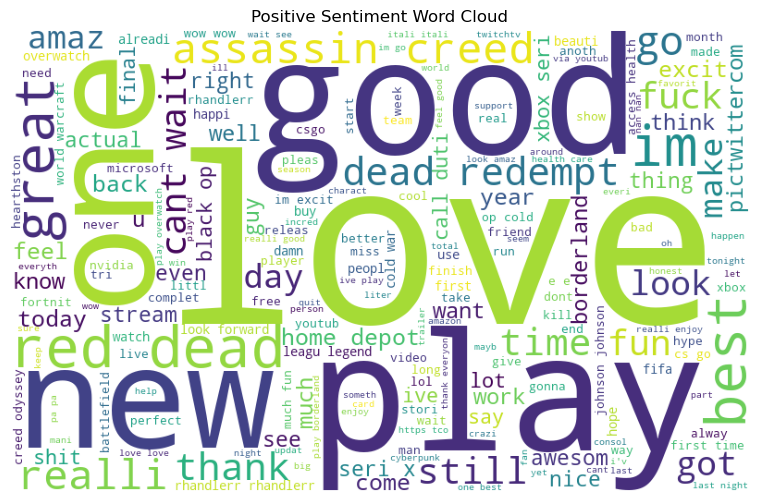

In [71]:
# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")


## Word Cloud : Negative Sentiment

In [72]:
negative_data = data[data['sentiment'] == 'Negative']['comment'].str.cat(sep=" ")

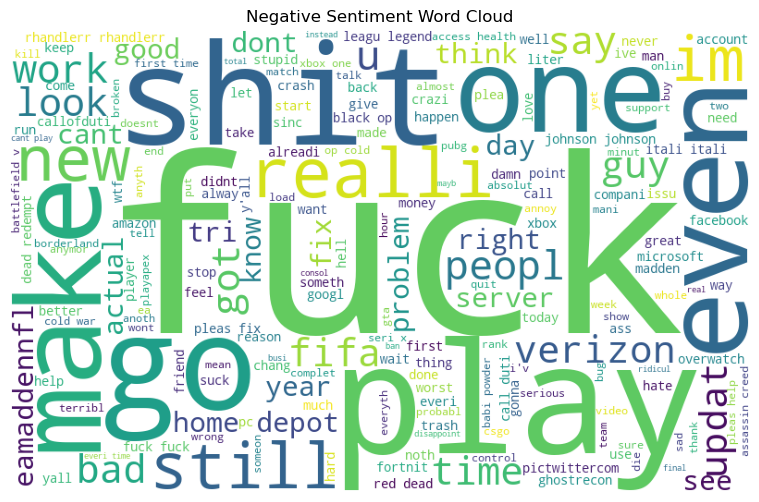

In [73]:
# Exclude the word "game" from the text data
negative_data = negative_data.replace("game", "")
if negative_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")


## Word Cloud : Neutral Sentiment

In [74]:
neutral_data = data[data['sentiment'] == 'Neutral']['comment'].str.cat(sep=" ")

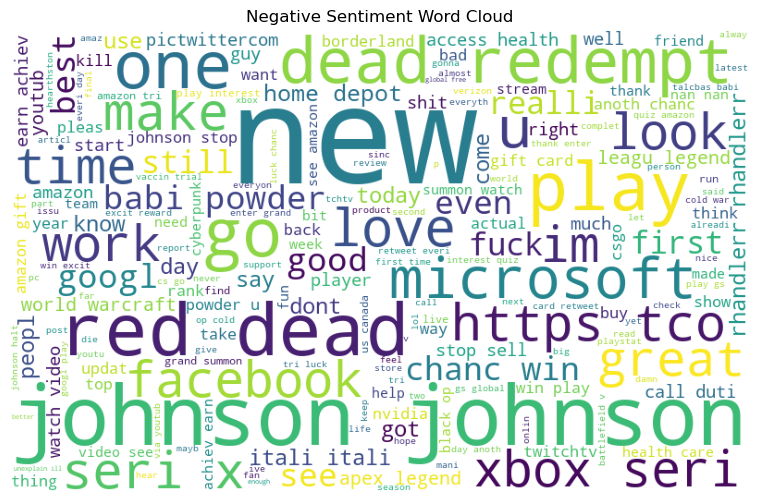

In [75]:
# Exclude the word "game" from the text data
neutral_data = neutral_data.replace("game", "")
if neutral_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(neutral_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")


## Word Cloud : Irrelevant Sentiment

In [76]:
irrelevant_data = data[data['sentiment'] == 'Irrelevant']['comment'].str.cat(sep=" ")

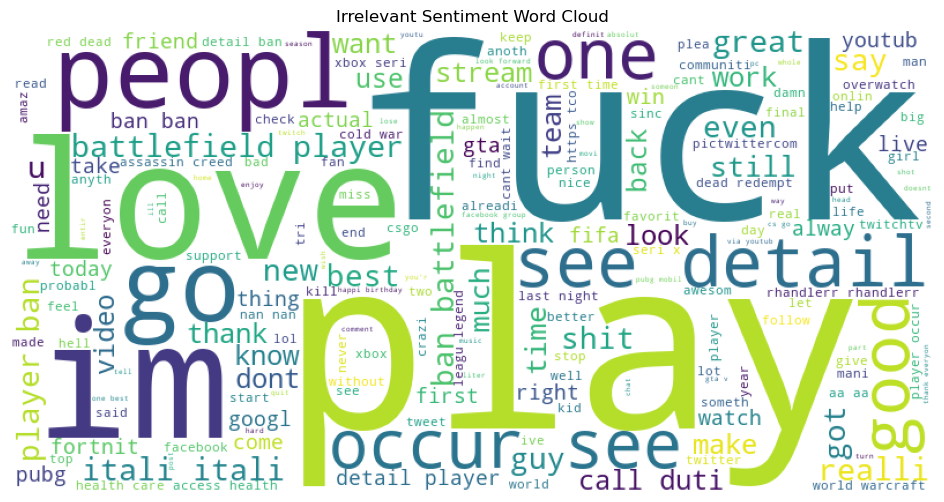

In [77]:
irrelevant_data = irrelevant_data.replace("game", "")

if irrelevant_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_data)
    plt.figure(figsize=(12, 6))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")


In [78]:
# Visualize the most positive and negative tweets
most_positive_tweet = data[data['Polarity'] == data['Polarity'].max()]['comment'].values[0]
most_negative_tweet = data[data['Polarity'] == data['Polarity'].min()]['comment'].values[0]

print('Most Positive Tweet:')
print(most_positive_tweet)

print('\nMost Negative Tweet:')
print(most_negative_tweet)

Most Positive Tweet:
platinum best loot borderland  

Most Negative Tweet:
terribl bitch
